In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time
import os

In [230]:
#def cT1_func(s, a, b, c, d, e ,f, g, h):
    #return np.exp(-a * s) + b / (1 + np.exp(-c * (s - d))) + e * s + f + g * s**2 + h * np.exp(-s)
#def cT1_func(s, a, b, c, d):
    #return a * s**3 + b * s**2 + c * s + d
#Gaussian Function
#def cT1_func(s, a, x0, sigma, d):
    #return a * np.exp(-((s - x0)**2) / (2 * sigma**2)) + d
#Double Exponential Function
#def cT1_func(s, a, b, c, d, e):
    #return a * s**2 + b * s + c + d * np.exp(-e * s)

#def custom_fit_func(s, a, b, c, d, e, f, g):
    #return a * s**2 + b * s + c + d * np.exp(-e * s) + f * np.exp(-g * s)
 # Define a double exponential function   
#def cT1_func(s, a, b, c, d, e):
    #return a * np.exp(-b * s) + c * np.exp(d * s) + e
# Define a piecewise function for fitting
#def cT1_func(s, a1, b1, c1, a2, b2, c2):
    # Exponential decay for the initial drop
    #decay = a1 * np.exp(-b1 * s) + c1
    # Polynomial for the gradual rise
   # rise = a2 * s**2 + b2 * s + c2
    # Piecewise selection based on the turning point (you can adjust the threshold)
    #return np.where(s < 0.1, decay, rise)

def cT1_func(s, a, b, c, d, e):
    # Rational function: numerator is quadratic, denominator is linear
    return (a * s**2 + b * s + c) / (d * s + e)

In [231]:
#def cT2_func(s, a, b, c, d):
    #return a * s**3 + b * s**2 + c * s + d
#def cT2_func(s, a, b, c, d, e, f, g):
    #return (a / (1 + np.exp(-b * (s - c)))) + (d * s) + e + (f * s**2) + (g * s**3)

#def cT2_func(s, a, b, c, d, e, f, g):
    #return a * s**2 + b * s + c + d * np.exp(-e * s) + f * np.exp(-g * s)

def cT2_func(s, a, b, c, d, e, f):
    gaussian = a * np.exp(-((s - b)**2) / (2 * c**2))  # Gaussian part for initial drop
    polynomial = d * s**2 + e * s + f  # Polynomial part for rise and plateau
    return gaussian + polynomial

In [306]:
def cT3_func(s, a, b, c, d, e, f, g):
    return (a * np.exp(-b * s)) + (c / (1 + np.exp(-d * (s - e)))) + (f * s) + g

def cT3_func(s, a, b, c, d, e, f, g, h, i, j):
    decay = a * np.exp(-b * s)  # Exponential decay for the initial sharp decrease
    logistic_growth = c / (1 + np.exp(-d * (s - e)))  # Logistic growth for the gradual increase
    gaussian_peak = f * np.exp(-((s - g)**2) / (2 * h**2))  # Gaussian for the sharp increase
    linear_decay = i + j * s  # Linear term for the final decrease
    return decay + logistic_growth + gaussian_peak + linear_decay

In [255]:
#def cT4_func(s, a, b, c, d, e, f, g):
    #return (a * s**2 + b * s + c) + (d * np.exp(-e * (s - f)**2)) + (g * s)

#def cT4_func(s, a, b, c, d, e):
    #gaussian = a * np.exp(-((s - b)**2) / (2 * c**2))  # Gaussian component for the initial peak
    #decay = d * np.exp(-e * s)  # Exponential decay component for the leveling off
    #return gaussian + decay
#def cT4_func(s, a, b, c, d, e):
    #rational = (a * s**2 + b * s + c) / (s + d)  # Rational function for initial peak
    #polynomial = e * s  # Polynomial term for leveling off
    #return rational + polynomial

def cT4_func(s, a, b, c, d, e):
    sigmoid = a / (1 + np.exp(-b * (s - c)))  # Sigmoid function for the initial rise and peak
    decay = d * np.exp(-e * s)  # Exponential decay term for leveling off
    return sigmoid + decay



In [234]:
#def cT5_func(s, a, b, c):
    #return a * np.exp(-b * s) + c
#def cT5_func(s, a, b, c, d, e):
    #growth = a * np.exp(b * s)  # Exponential growth part for the initial rise
    #decay = c * np.exp(-d * s) + e  # Exponential decay part for the drop and leveling off
    #return growth + decay

#def cT5_func(s, a, b, c, d, e):
    #gaussian = a * np.exp(-((s - b)**2) / (2 * c**2))  # Gaussian part for the initial peak
    #decay = d * np.exp(-e * s)  # Exponential decay part for the gradual decrease
    #return gaussian + decay

def cT5_func(s, a, b, c, d, e, f):
    rational = (a * s**2 + b * s + c) / (d * s + 1)  # Rational function part
    decay = e * np.exp(-f * s)  # Exponential decay part
    return rational + decay

In [260]:
#def cT6_func(s, a, b, c, d):
 #   return a * s**3 + b * s**2 + c * s + d 


#def cT6_func(s, a, b, c, d, e, f, g):
    #gaussian = a * np.exp(-((s - b)**2) / (2 * c**2))  # Gaussian for initial rapid rise and peak
    #decay = d * np.exp(-e * s)  # Exponential decay for the drop after the peak
    #logistic = f / (1 + np.exp(-g * (s - b)))  # Logistic growth for the rise and leveling off
    #return gaussian + decay + logistic
#def cT6_func(s, a, b, c, d, e, f):
    #gaussian = a * np.exp(-((s - b)**2) / (2 * c**2))  # Gaussian for sharp initial increase
    #decay = d * np.exp(-e * s)  # Exponential decay for rapid drop
    #linear = f * s  # Linear term for leveling off
    #return gaussian + decay + linear

def cT6_func(s, a, b, c, d, e, f, g, h, i, j):
    gaussian1 = a * np.exp(-((s - b)**2) / (2 * c**2))  # First Gaussian for initial increase
    decay = d * np.exp(-e * s)  # Exponential decay for rapid drop
    gaussian2 = f * np.exp(-((s - g)**2) / (2 * h**2))  # Second Gaussian for the rise
    logistic = i / (1 + np.exp(-j * (s - g)))  # Logistic function for final leveling off
    return gaussian1 + decay + gaussian2 + logistic

##Load data for StrRt0.0001

In [4]:
file_path = "Parameters_6_Fitted_FC_TmpDpn_RD_StrRt0.0001.csv"
data = pd.read_csv(file_path)
PEEQ = data["PEEQ"].to_numpy()
PEEQ_fit = np.linspace(np.min(PEEQ), np.max(PEEQ), 200)

##visualize the data

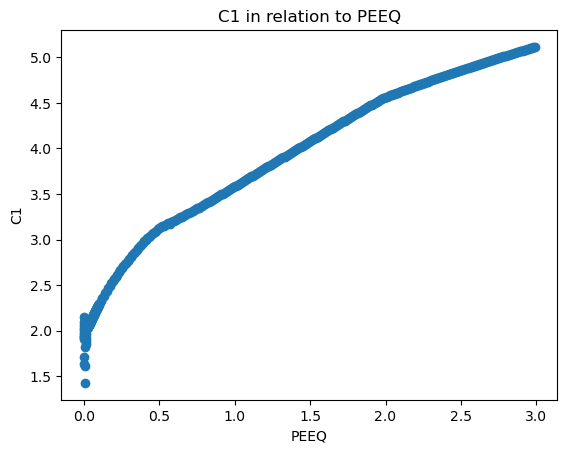

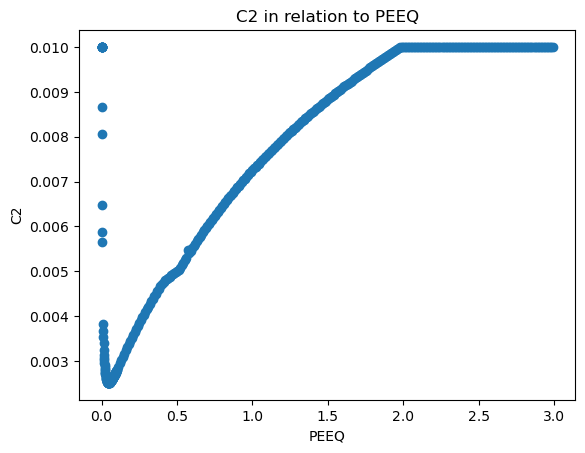

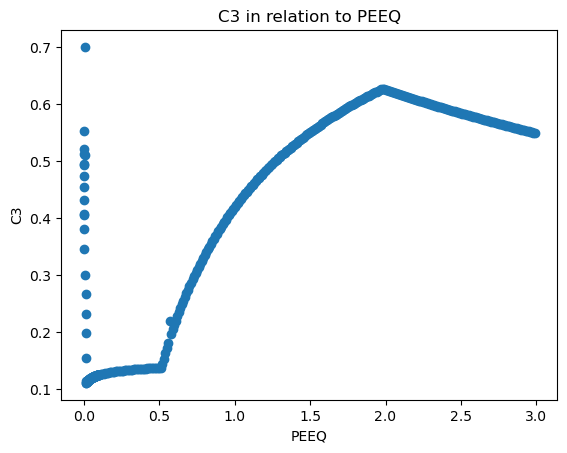

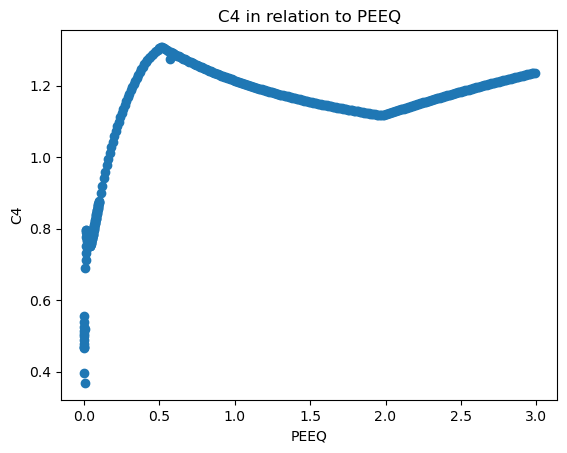

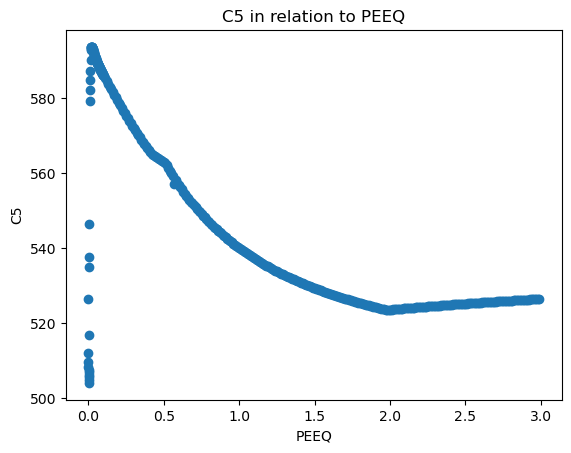

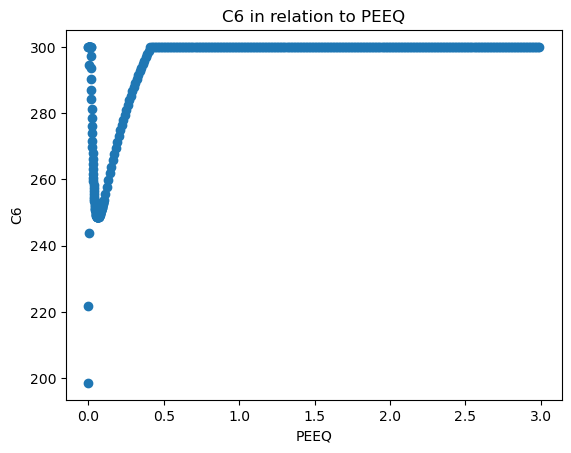

In [53]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure()
    plt.plot(data['PEEQ'], data[column], 'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    plt.show()

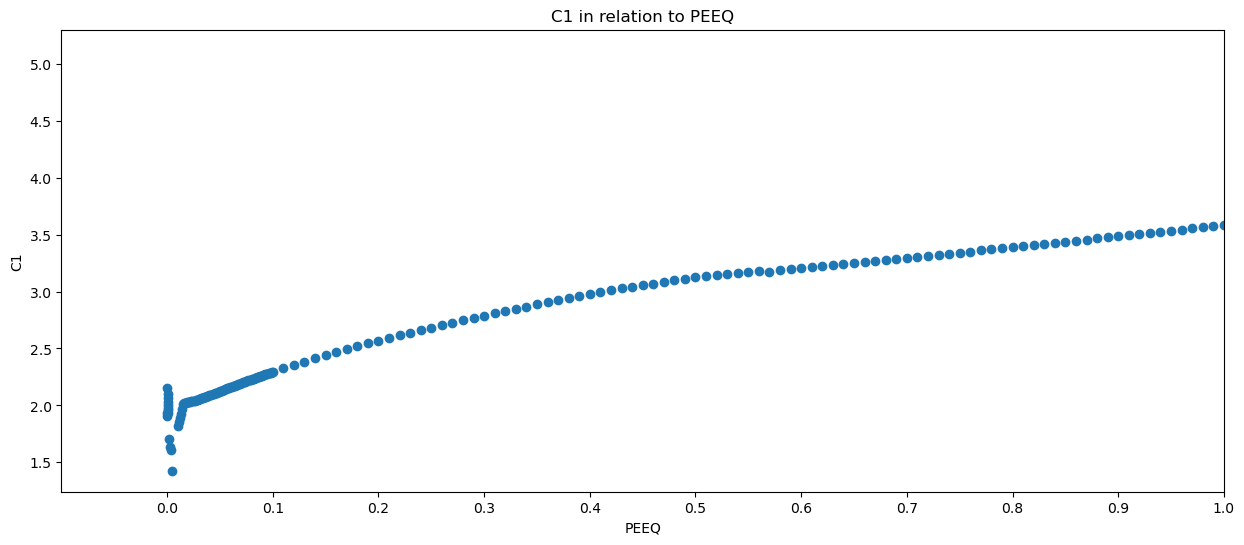

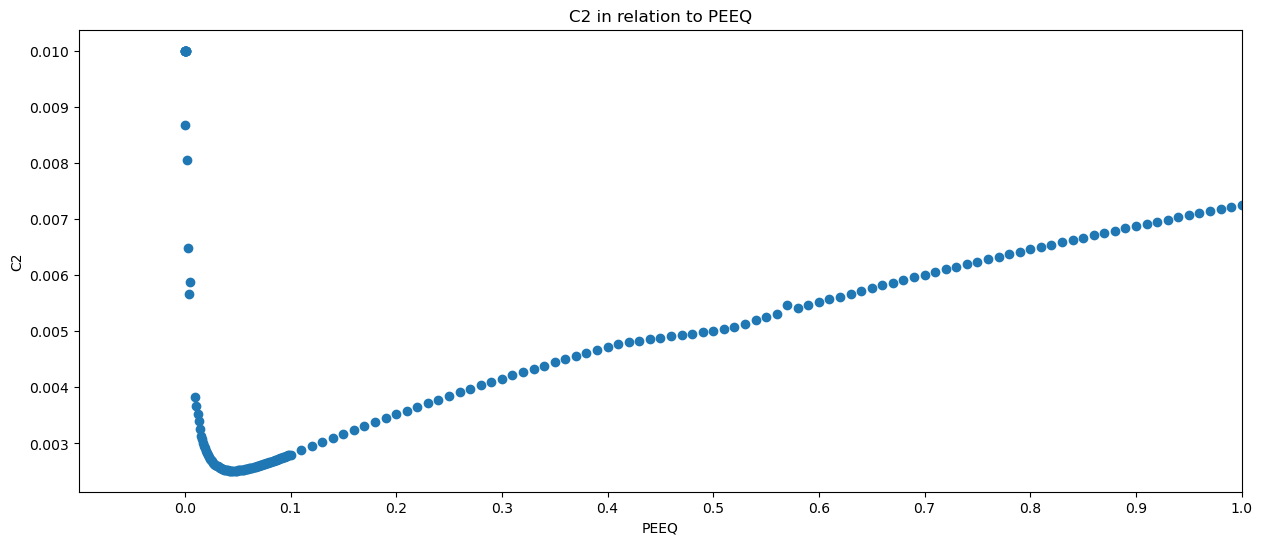

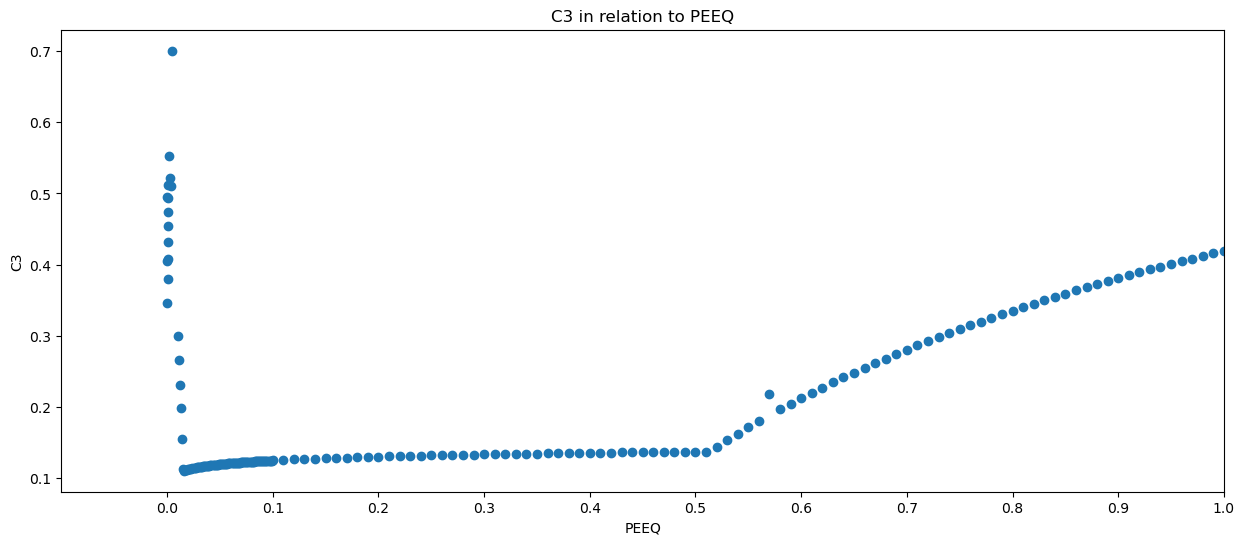

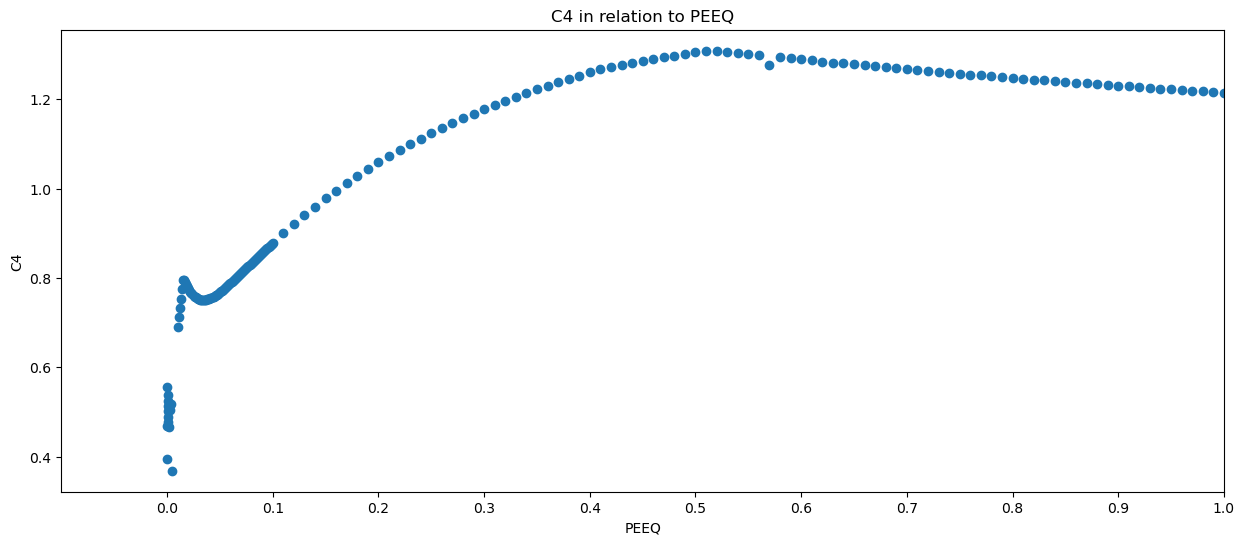

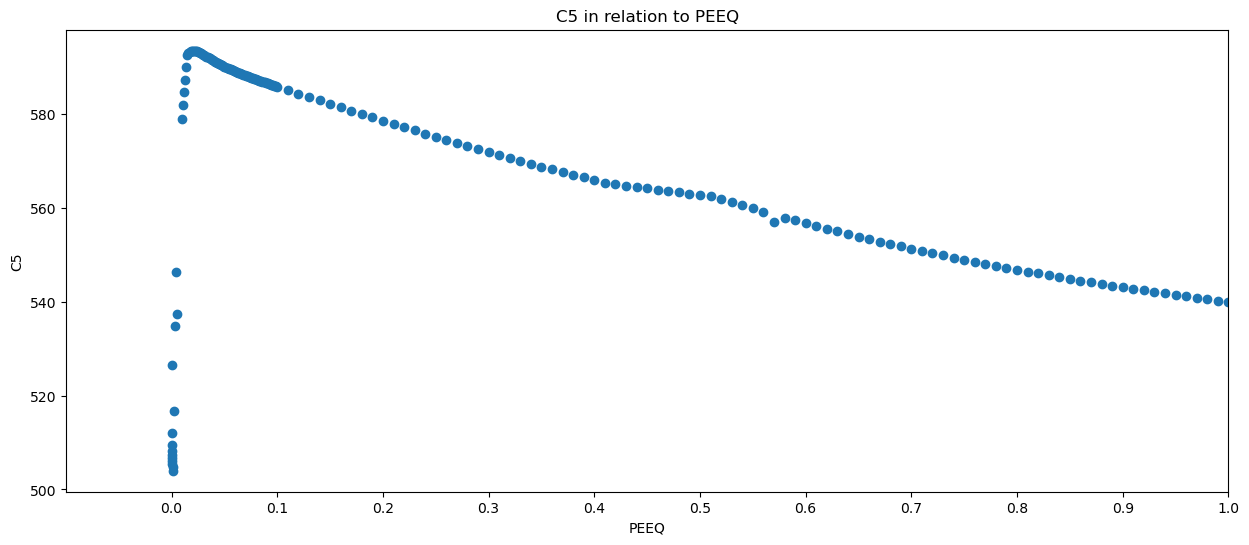

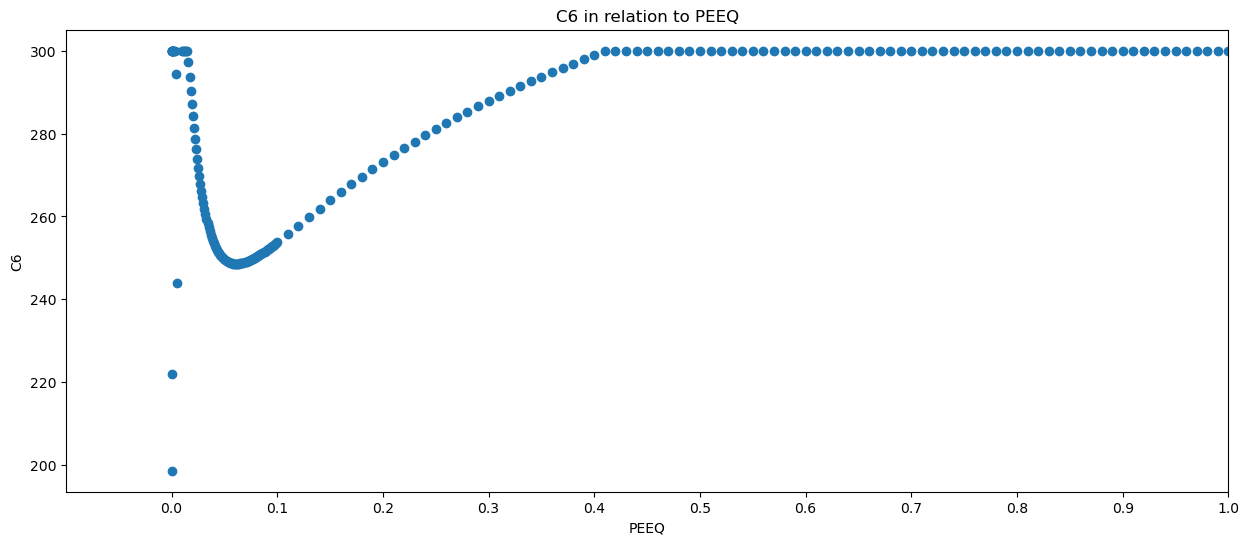

In [23]:
columns_to_plot = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
for column in columns_to_plot:
    plt.figure(figsize=(15, 6))  # Increase the figure size
    plt.plot(data['PEEQ'], data[column], 'o')
    plt.xlabel('PEEQ')
    plt.ylabel(column)
    plt.title(f'{column} in relation to PEEQ')
    
    # Set x-axis intervals to be smaller, e.g., every 0.1
    x_ticks = np.arange(0, data['PEEQ'].max() + 0.1, 0.1)
    plt.xticks(x_ticks)
    
    # Adjust the x-axis limit to focus on smaller x values
    plt.xlim(-0.1, 1)  # Change 1 to a higher value if you want to see a broader range
    
    plt.show()

In [15]:
##df_para_fit = pd.DataFrame(PEEQ_fit, columns=["PEEQ_fit"])
df_para_fit = pd.DataFrame(PEEQ, columns=["PEEQ"])

cT1 = data["C1"].to_numpy()
#initial_guess = [1.369, 5.312, 4.964, -0.218, 2.677, -5.0, -0.359, 1.942]
#param_bounds = ([0.1, 0, 0.1, -1, 0, -10, -1, 0], [10, 10, 20, 1, 10, 0, 1, 10])
initial_guess = [0.1, 0.1, 0.1, 1.5]
param_bounds = ([-10, -10, -10, 1], [10, 10, 10, 5])

params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guess, bounds=param_bounds, maxfev = 1000000)
#[a, b, c, d, e, f, g ,h] = params
#para_fit = cT1_func(PEEQ_fit, a, b, c, d, e, f, g, h)
[a, b, c, d] = params
##para_fit = cT1_func(PEEQ_fit, a, b, c, d)
para_fit = cT1_func(PEEQ, a, b, c, d)

##plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ_fit, para_fit)
plotObjects = plt.plot(PEEQ, cT1, 'o', PEEQ, para_fit)

# Calculate R-squared
#residuals = cT1 - cT1_func(PEEQ, a, b, c, d, e, f, g ,h)
residuals = cT1 - cT1_func(PEEQ, a, b, c, d)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f, h=%5.3f' % (a, b, c, d, e, f, g, h)))
plt.legend(iter(plotObjects), ('CT1', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % (a, b, c, d)))
plt.title(f'C1, R-squared: {r_squared}')
plt.show()
df_para_fit['CT1'] = para_fit

ValueError: too many values to unpack (expected 4)

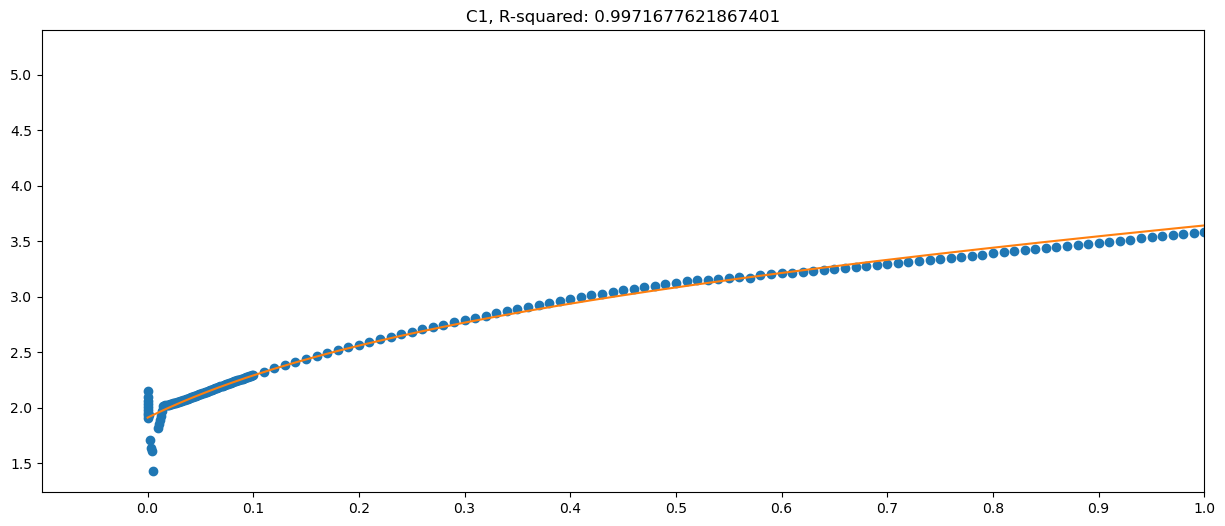

In [236]:
df_para_fit = pd.DataFrame(PEEQ, columns=["PEEQ"])

cT1 = data["C1"].to_numpy()
initial_guess = [1, 1, 1, 1, 1]
param_bounds = ([-10, -10, -10, -10, 0.1], [10, 10, 10, 10, 10])
    
    # Fit the function to the data
params, _ = curve_fit(cT1_func, PEEQ, cT1, p0=initial_guess, bounds=param_bounds, maxfev=100000)
para_fit = cT1_func(PEEQ, *params)
    
# Plotting the results
plt.figure(figsize=(15, 6))  # Increase the figure size
plt.plot(PEEQ, cT1, 'o', label='CT1')
plt.plot(PEEQ, para_fit, label='fit: ' + ', '.join([f'{p}={v:.3f}' for p, v in zip(['a', 'b', 'c', 'd', 'e'], params)]))

# Calculate R-squared
residuals = cT1 - para_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT1 - np.mean(cT1))**2)
r_squared = 1 - (ss_res / ss_tot)

# Add legend and title with R-squared value
#plt.legend()
plt.title(f'C1, R-squared: {r_squared}')

# Set x-axis intervals to be smaller, e.g., every 0.1
x_ticks = np.arange(0, data['PEEQ'].max() + 0.1, 0.1)
plt.xticks(x_ticks)
    
# Adjust the x-axis limit to focus on smaller x values
plt.xlim(-0.1, 1)  # Change 1 to a higher value if you want to see a broader range

plt.show()
df_para_fit['CT1'] = para_fit

In [38]:
cT2 = data["C2"].to_numpy()
#initial_guess = [0.012, 1.366, 0.683, -0.000, 0.001]
#bounds = ([0, 1, 0.6, -0.01, -0.001], [0.05, 2, 0.8, 0.01, 0.001])
initial_guess = [-0.27, 1.25, 0.01, 0.1, 0.14, -0.02, 0.001]
bounds = ([-1, 0.5, -0.1, 0, 0, -0.1, -0.01], [0, 2, 0.1, 0.2, 0.3, 0, 0.01])

params = curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
#[a, b, c, d, e, f] = params[0]
#para_fit = cT2_func(PEEQ_fit, a, b, c, d, e, f)
[a, b, c, d, e, f, g] = params[0]
para_fit = cT2_func(PEEQ, a, b, c, d, e, f, g)


##plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ_fit, para_fit)
plotObjects = plt.plot(PEEQ, cT2, 'o', PEEQ, para_fit)
# Calculate R-squared
#residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f)
residuals = cT2 - cT2_func(PEEQ, a, b, c, d, e, f, g)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Create the legend
#plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f' % (a, b, c, d, e, f)))
plt.legend(iter(plotObjects), ('CT2', 'fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.3f, f=%5.3f, g=%5.3f' % (a, b, c, d, e, f, g)))
plt.title(f'C2, R-squared: {r_squared}')
plt.show()
df_para_fit['CT2'] = para_fit

TypeError: cT2_func() takes 7 positional arguments but 8 were given

## OK CT2

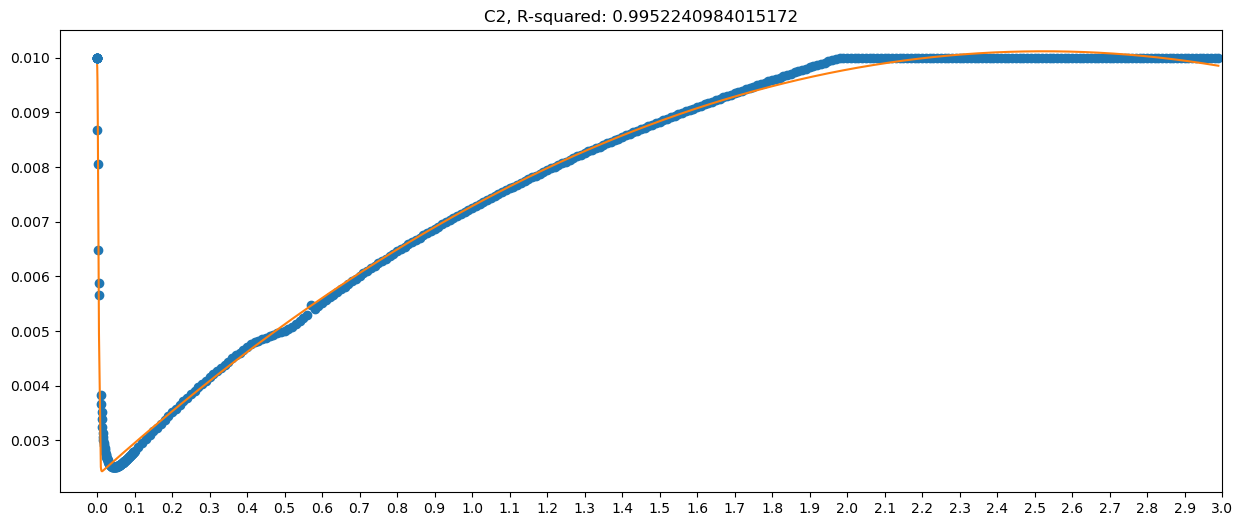

In [237]:
cT2 = data["C2"].to_numpy()


initial_guess = [-0.0005, 0.005, 0.001, 0.005, 0.02, 0.003]
bounds = ([-10, 0, 0.001, -10, -10, -10], [10, 1, 1, 10, 10, 10])
    
    # Fit the function to the data
params, _= curve_fit(cT2_func, PEEQ, cT2, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
    
    # Generate fitted values
para_fit = cT2_func(PEEQ, *params)
    
# Plotting the results
plt.figure(figsize=(15, 6))  # Increase the figure size
plt.plot(PEEQ, cT2, 'o', label='CT2')
plt.plot(PEEQ, para_fit, label='fit: ' + ', '.join([f'{p}={v:.3f}' for p, v in zip(['a', 'b', 'c', 'd', 'e', 'f'], params)]))

# Calculate R-squared
residuals = cT2 - para_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT2 - np.mean(cT2))**2)
r_squared = 1 - (ss_res / ss_tot)

# Add legend and title with R-squared value
#plt.legend()
plt.title(f'C2, R-squared: {r_squared}')

# Set x-axis intervals to be smaller, e.g., every 0.1
x_ticks = np.arange(0, data['PEEQ'].max() + 0.1, 0.1)
plt.xticks(x_ticks)
    
# Adjust the x-axis limit to focus on smaller x values
plt.xlim(-0.1, 3)  # Change 1 to a higher value if you want to see a broader range

plt.show()
df_para_fit['CT2'] = para_fit

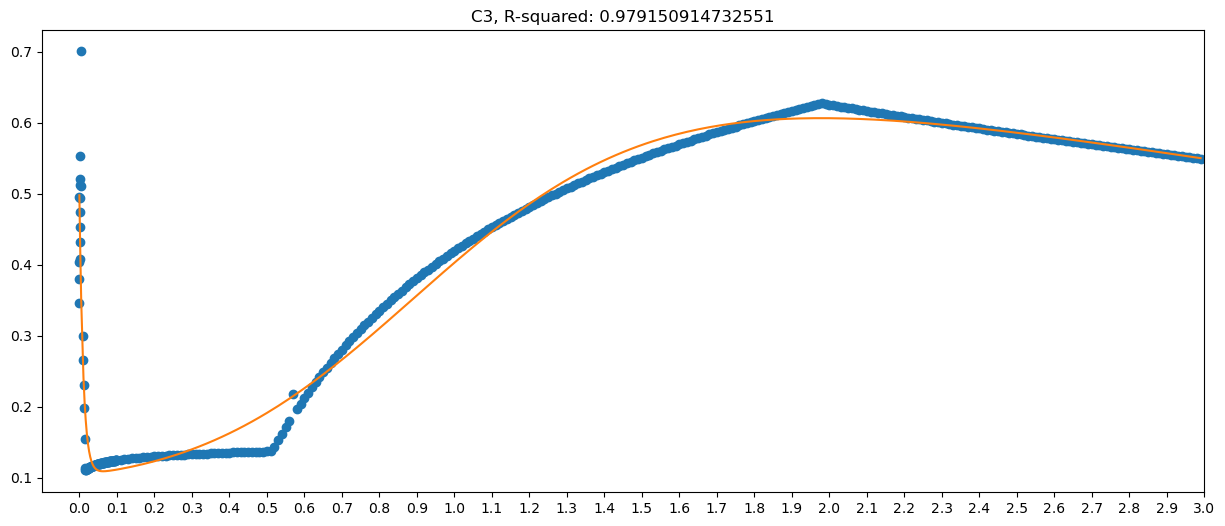

In [308]:
cT3 = data["C3"].to_numpy()


initial_guess = [1, 5, 0.3, 1, 0.5, 1, 1.5, 0.1, 0.5, -0.1]  # Adjust based on observed data trends
bounds = ([0, 0, 0, 0, 0, 0, 0, 0, -np.inf, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, 0])
    
    # Fit the function to the data
params, _= curve_fit(cT3_func, PEEQ, cT3, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
    
    # Generate fitted values
para_fit = cT3_func(PEEQ, *params)
    
# Plotting the results
plt.figure(figsize=(15, 6))  # Increase the figure size
plt.plot(PEEQ, cT3, 'o', label='CT3')
plt.plot(PEEQ, para_fit, label='fit: ' + ', '.join([f'{p}={v:.3f}' for p, v in zip(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'], params)]))

# Calculate R-squared
residuals = cT3 - para_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT3 - np.mean(cT3))**2)
r_squared = 1 - (ss_res / ss_tot)

# Add legend and title with R-squared value
#plt.legend()
plt.title(f'C3, R-squared: {r_squared}')

# Set x-axis intervals to be smaller, e.g., every 0.1
x_ticks = np.arange(0, data['PEEQ'].max() + 0.1, 0.1)
plt.xticks(x_ticks)
    
# Adjust the x-axis limit to focus on smaller x values
plt.xlim(-0.1, 3)  # Change 1 to a higher value if you want to see a broader range

plt.show()
df_para_fit['CT3'] = para_fit

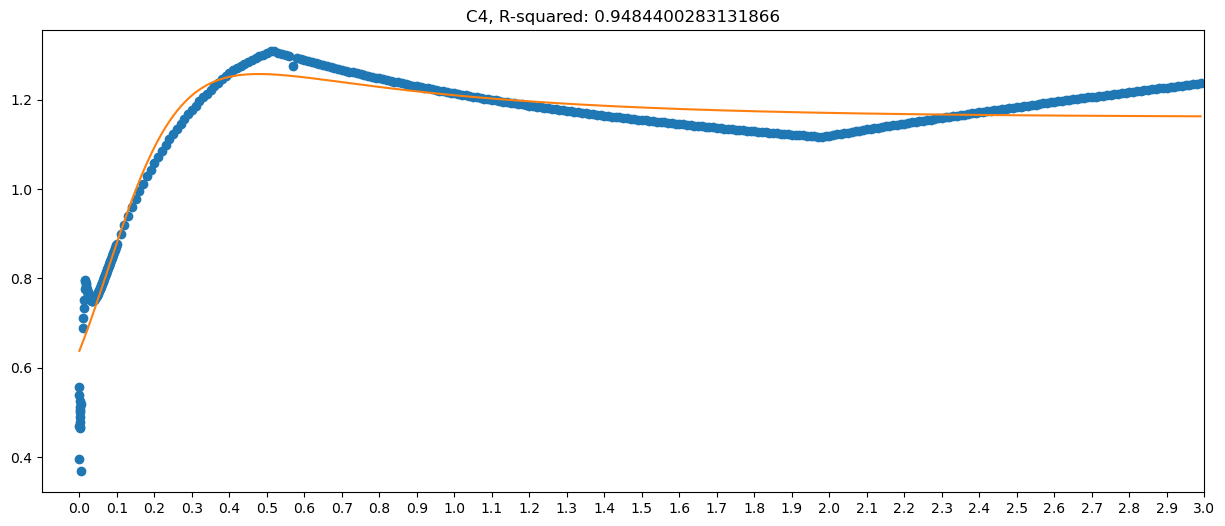

In [312]:
cT4 = data["C4"].to_numpy()

params = curve_fit(cT4_func, PEEQ, cT4, maxfev = 1000000)
#initial_guess = [1.5, 0.5, 0.05, 1.5, 0.8]
#bounds = ([0, 0, 0.001, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])
#initial_guess = [500.0, 500, 0.8, 0.05, 0.1] 
#bounds = ([-np.inf, -np.inf, -np.inf, 0, -np.inf], [np.inf, np.inf, np.inf, np.inf, np.inf])
#initial_guess = [10,0.1, 0.01, 0.05, -0.2]  
#bounds = ([-10, 0, 0, 0, -10], [np.inf, np.inf, np.inf, np.inf, np.inf])
initial_guess = [0.005, 200, 1.0, 0.05, 0.02]
bounds = ([-np.inf, -np.inf, -np.inf, 0.01, 0.01], [np.inf, np.inf, np.inf, np.inf, np.inf])
params, _= curve_fit(cT4_func, PEEQ, cT4, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
    # Generate fitted values
para_fit = cT4_func(PEEQ, *params)
    
# Plotting the results
plt.figure(figsize=(15, 6))  # Increase the figure size
plt.plot(PEEQ, cT4, 'o', label='CT5')
plt.plot(PEEQ, para_fit, label='fit: ' + ', '.join([f'{p}={v:.3f}' for p, v in zip(['a', 'b', 'c', 'd', 'e'], params)]))

# Calculate R-squared
residuals = cT4 - para_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT4 - np.mean(cT4))**2)
r_squared = 1 - (ss_res / ss_tot)

# Add legend and title with R-squared value
#plt.legend()
plt.title(f'C4, R-squared: {r_squared}')

# Set x-axis intervals to be smaller, e.g., every 0.1
x_ticks = np.arange(0, data['PEEQ'].max() + 0.1, 0.1)
plt.xticks(x_ticks)
    
# Adjust the x-axis limit to focus on smaller x values
plt.xlim(-0.1, 3)  # Change 1 to a higher value if you want to see a broader range

plt.show()
df_para_fit['CT4'] = para_fit


## OK CT5

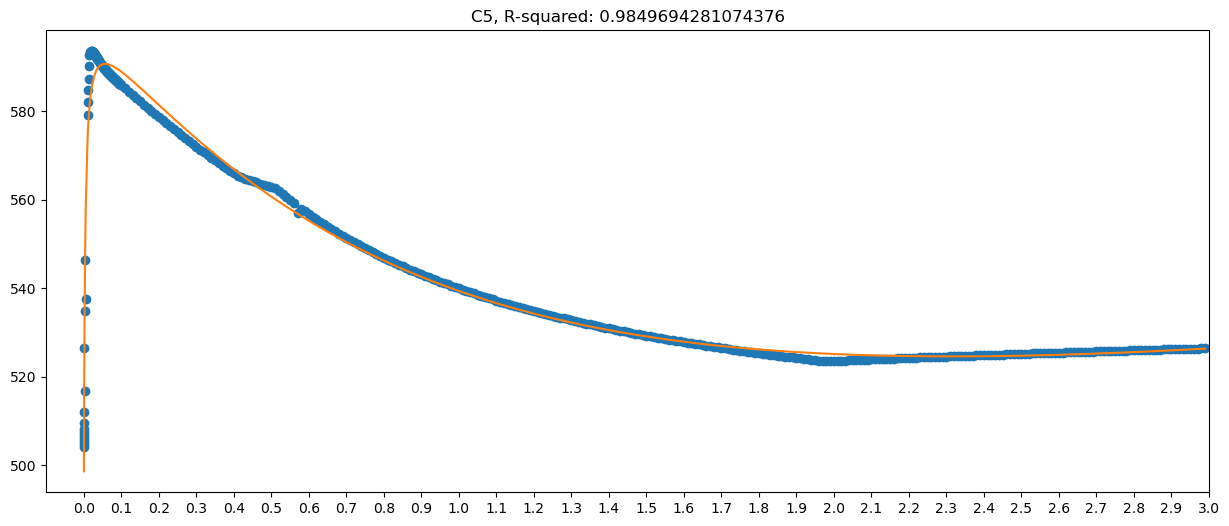

In [240]:
cT5 = data["C5"].to_numpy()


initial_guess = [100, -50, 580, 1, 50, 1] 
bounds = ([-np.inf, -np.inf, 0, 0, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
    
    # Fit the function to the data
params, _= curve_fit(cT5_func, PEEQ, cT5, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
    
    # Generate fitted values
para_fit = cT5_func(PEEQ, *params)
    
# Plotting the results
plt.figure(figsize=(15, 6))  # Increase the figure size
plt.plot(PEEQ, cT5, 'o', label='CT5')
plt.plot(PEEQ, para_fit, label='fit: ' + ', '.join([f'{p}={v:.3f}' for p, v in zip(['a', 'b', 'c', 'd', 'e', 'f'], params)]))

# Calculate R-squared
residuals = cT5 - para_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT5 - np.mean(cT5))**2)
r_squared = 1 - (ss_res / ss_tot)

# Add legend and title with R-squared value
#plt.legend()
plt.title(f'C5, R-squared: {r_squared}')

# Set x-axis intervals to be smaller, e.g., every 0.1
x_ticks = np.arange(0, data['PEEQ'].max() + 0.1, 0.1)
plt.xticks(x_ticks)
    
# Adjust the x-axis limit to focus on smaller x values
plt.xlim(-0.1, 3)  # Change 1 to a higher value if you want to see a broader range

plt.show()
df_para_fit['CT5'] = para_fit

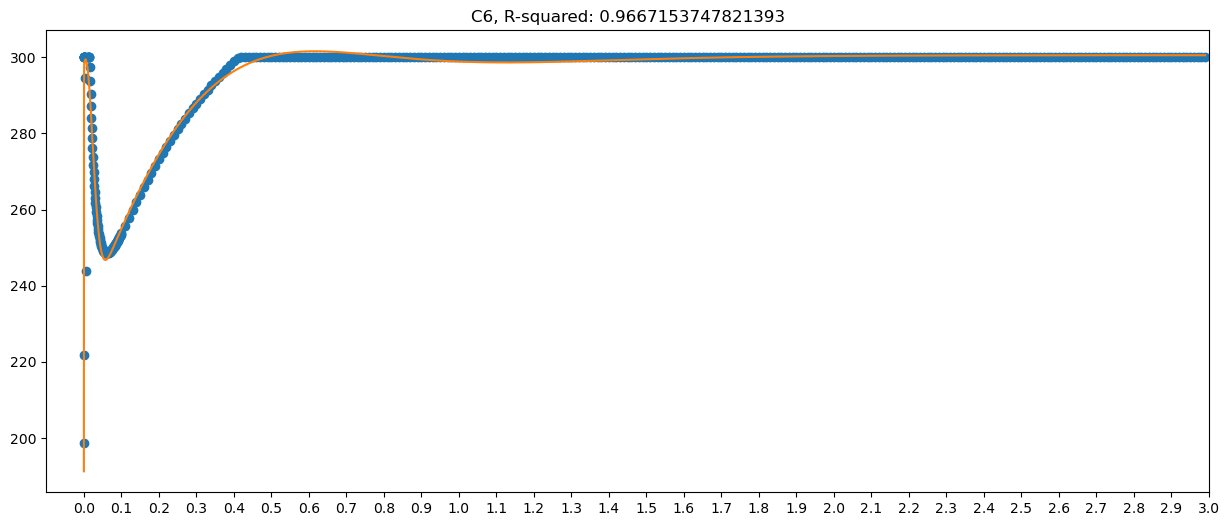

In [287]:
cT6 = data["C6"].to_numpy()


#initial_guess = [50, 0.005, 0.001, -150, 5, 200, 1.5, 0.2, 300, 1]
#bounds = ([-np.inf, 0, 0.001, -np.inf, 0, 0, 0, 0.001, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
initial_guess = [10, 0.002, 0.001, -150, 5, 200, 1.5, 0.2, 300, 1]  # Adjusted initial guesses
bounds = ([-np.inf, 0, 0.001, -np.inf, 0, 0, 0, 0.001, 0, 0], [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf, np.inf])
    
    # Fit the function to the data
params, _= curve_fit(cT6_func, PEEQ, cT6, p0=initial_guess, bounds=bounds, method='trf', maxfev = 1000000)
    
    # Generate fitted values
para_fit = cT6_func(PEEQ, *params)
    
# Plotting the results
plt.figure(figsize=(15, 6))  # Increase the figure size
plt.plot(PEEQ, cT6, 'o', label='CT6')
plt.plot(PEEQ, para_fit, label='fit: ' + ', '.join([f'{p}={v:.3f}' for p, v in zip(['a', 'b', 'c', 'd', 'e', 'f','g', 'h', 'i', 'j'], params)]))

# Calculate R-squared
residuals = cT6 - para_fit
ss_res = np.sum(residuals**2)
ss_tot = np.sum((cT6 - np.mean(cT6))**2)
r_squared = 1 - (ss_res / ss_tot)

# Add legend and title with R-squared value
#plt.legend()
plt.title(f'C6, R-squared: {r_squared}')

# Set x-axis intervals to be smaller, e.g., every 0.1
x_ticks = np.arange(0, data['PEEQ'].max() + 0.1, 0.1)
plt.xticks(x_ticks)
    
# Adjust the x-axis limit to focus on smaller x values
plt.xlim(-0.1, 3)  # Change 1 to a higher value if you want to see a broader range

plt.show()
df_para_fit['CT6'] = para_fit

In [313]:
df_para_fit.to_csv('para_fit_results_0.0001.csv', index=False)

##Use optimized inputs to validate

In [314]:
# Assuming the file is one level up from the current directory
file_path = "Fitted_FC_TmpDpn_RD_StrRt0.0001_ref.csv"
stress_data = pd.read_csv(file_path)

fitted_para = pd.read_csv('para_fit_results_0.0001.csv')

[1.36251004 0.72599133 0.4815976  0.72841393 0.82948758 0.82191691
 0.57495016]


/tmp/ipykernel_383/1491831523.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))


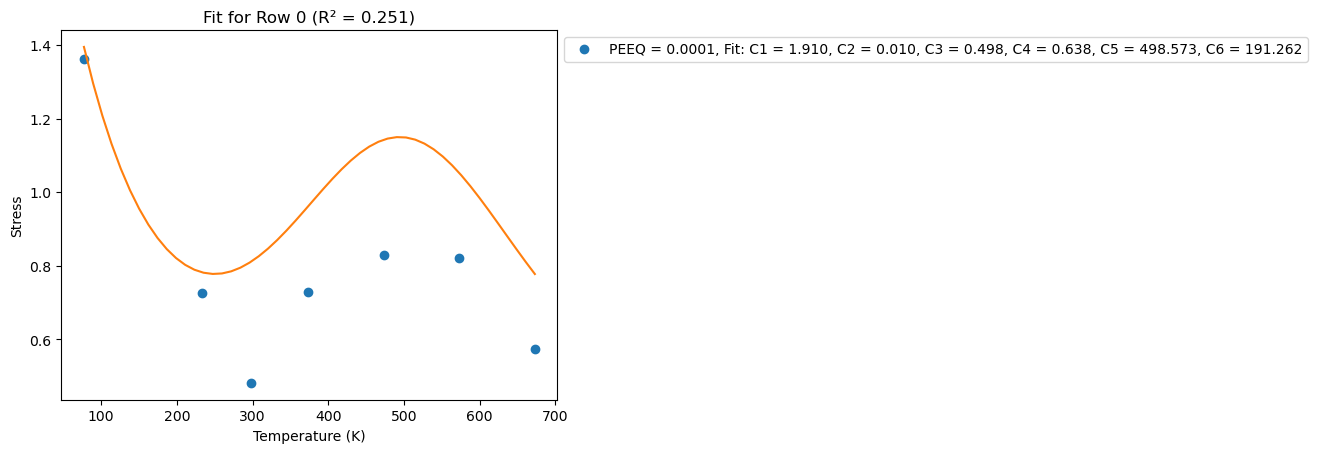

[1.38362624 0.75022644 0.59327141 0.78766057 0.86840388 0.84906686
 0.69294547]


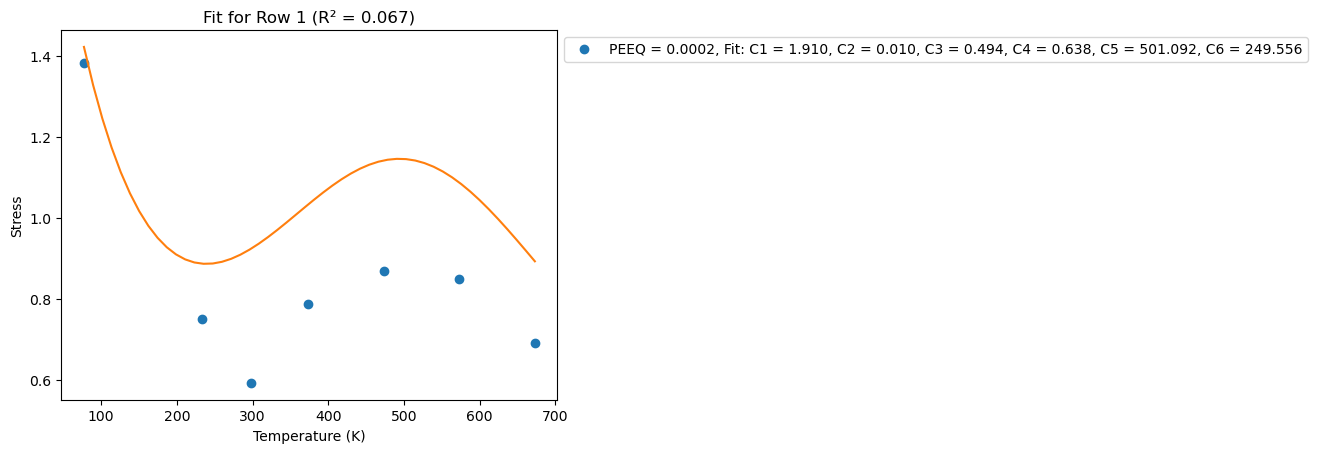

[1.39661004 0.76880383 0.73903496 0.81717545 0.89282197 0.86740631
 0.73184152]


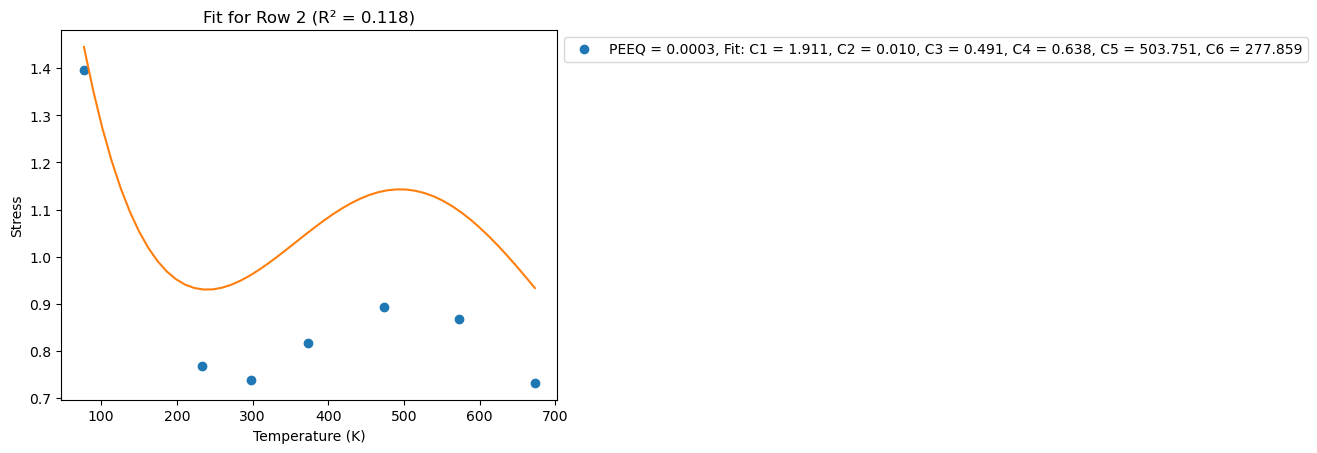

[1.4088003  0.78823669 0.80236574 0.84141439 0.9144373  0.88482855
 0.7604725 ]


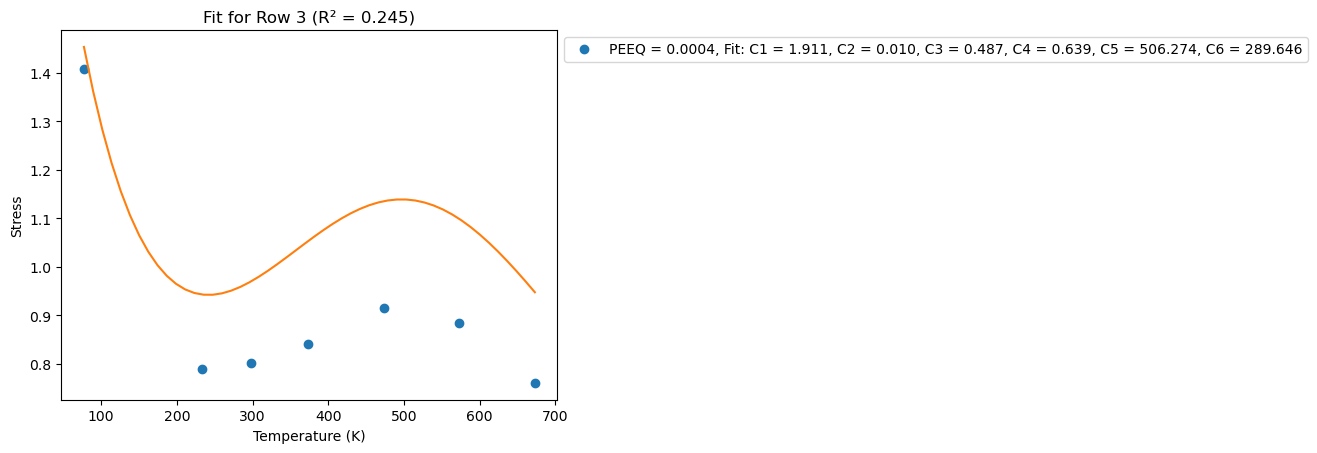

[1.4194923  0.80649924 0.83371755 0.86048538 0.93187057 0.8998833
 0.78170283]


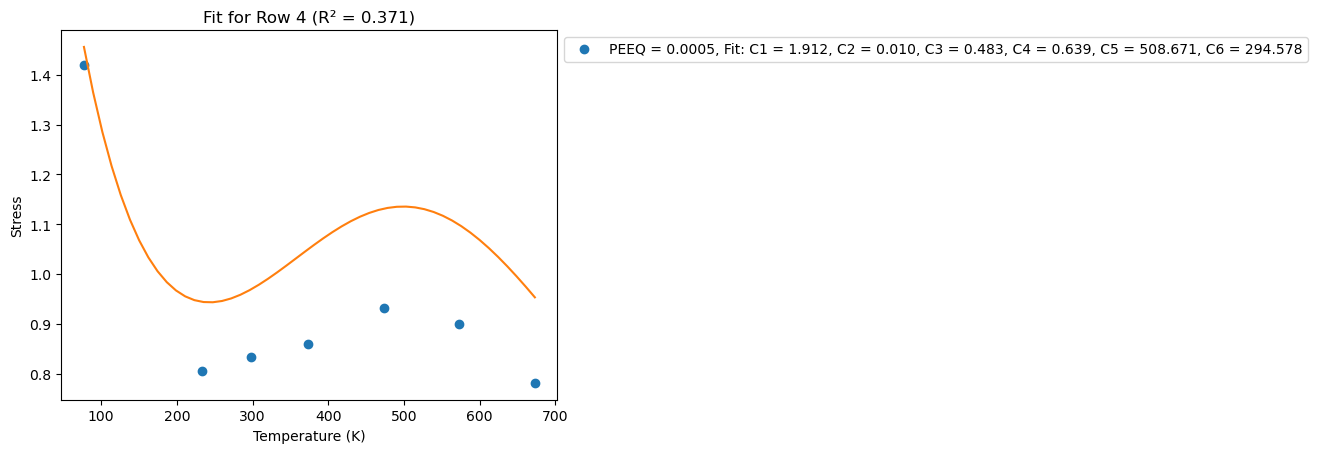

[1.42913371 0.82368626 0.85473254 0.87625236 0.94629534 0.9130995
 0.7986485 ]


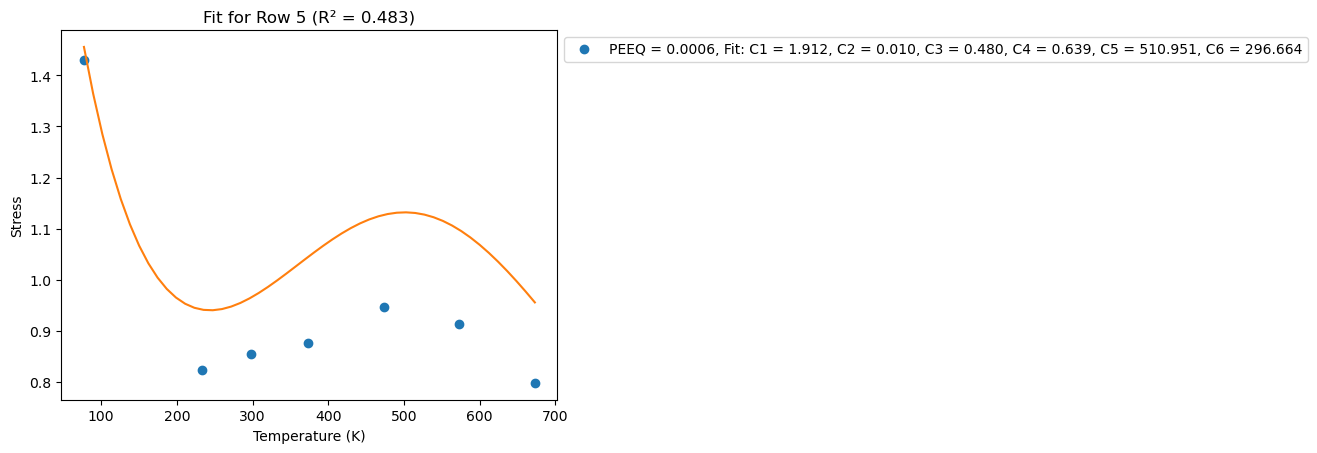

[1.43798219 0.83988294 0.87162077 0.88972207 0.95852643 0.92485234
 0.81279316]


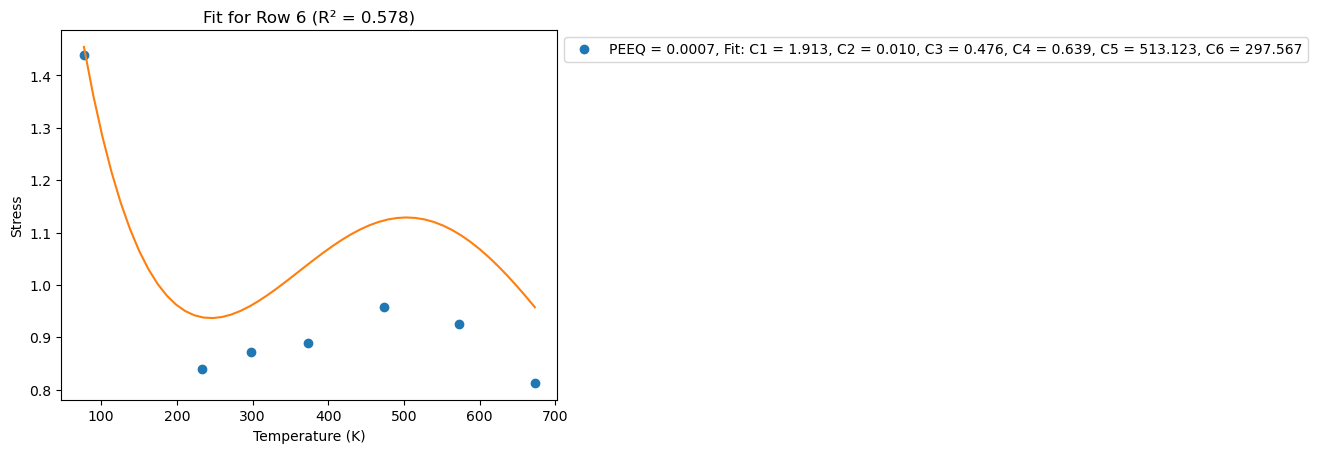

[1.46805583 0.89619448 0.92251927 0.93004991 0.99464934 0.96183385
 0.85385738]


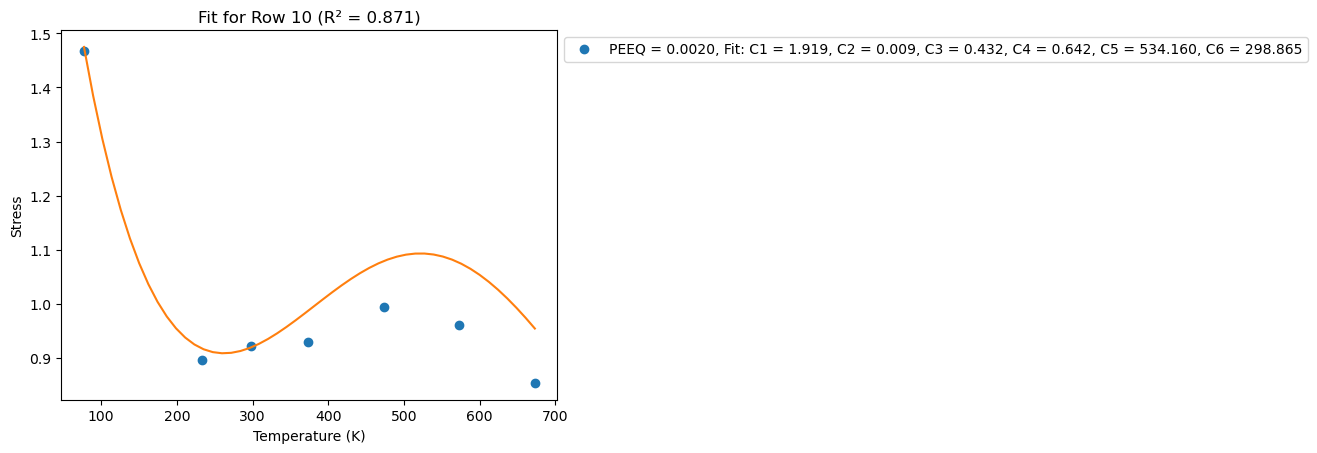

[1.52308237 0.99512694 1.         0.99046308 1.05028236 1.0195775
 0.91318337]


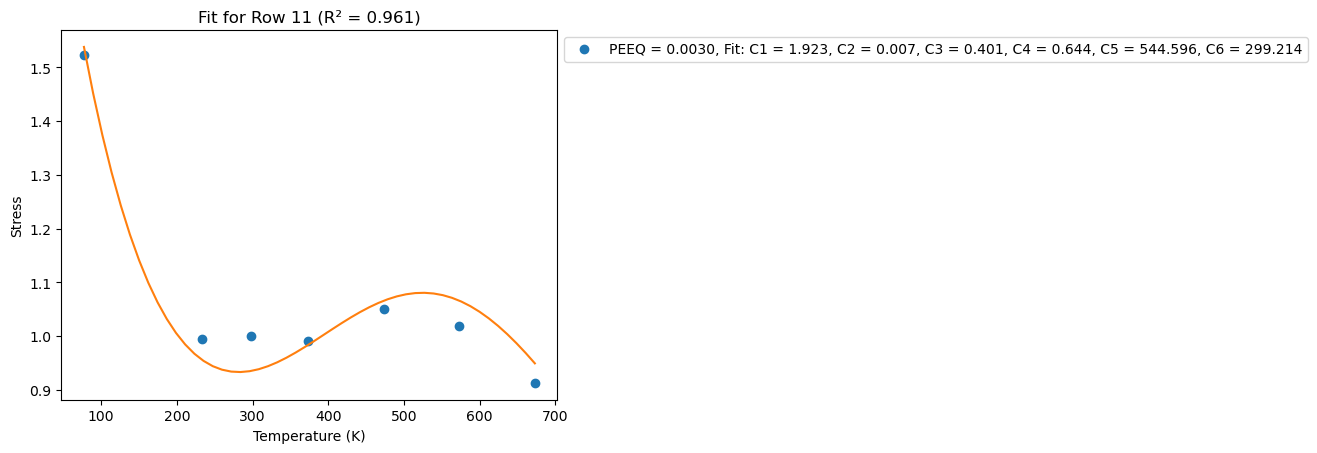

[1.61818012 1.13342744 1.10571589 1.08022565 1.13822488 1.1094487
 0.99792427]


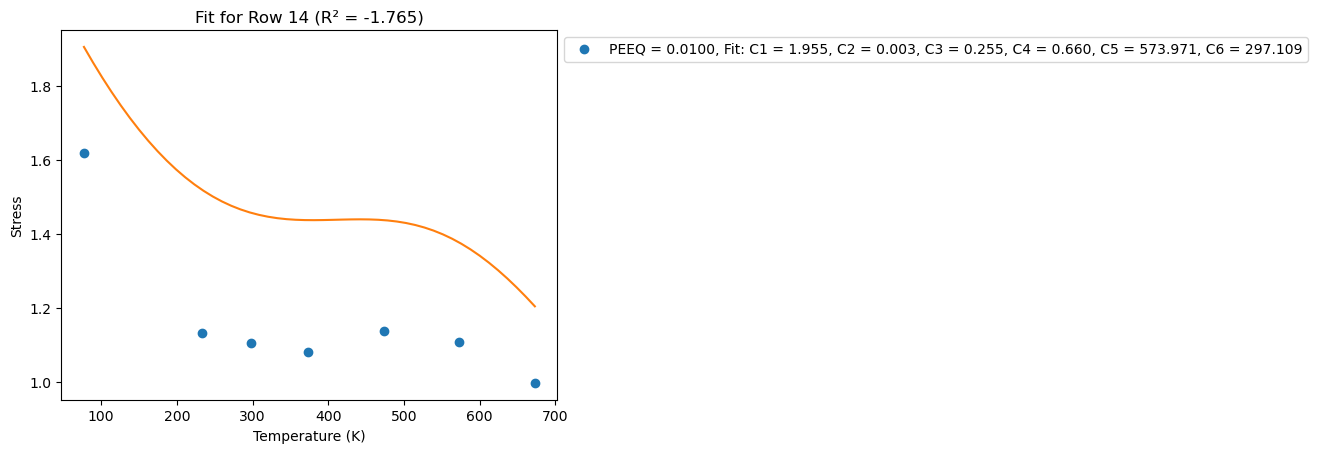

[1.69361316 1.2197177  1.18081648 1.15389214 1.21047734 1.19093161
 1.06323152]


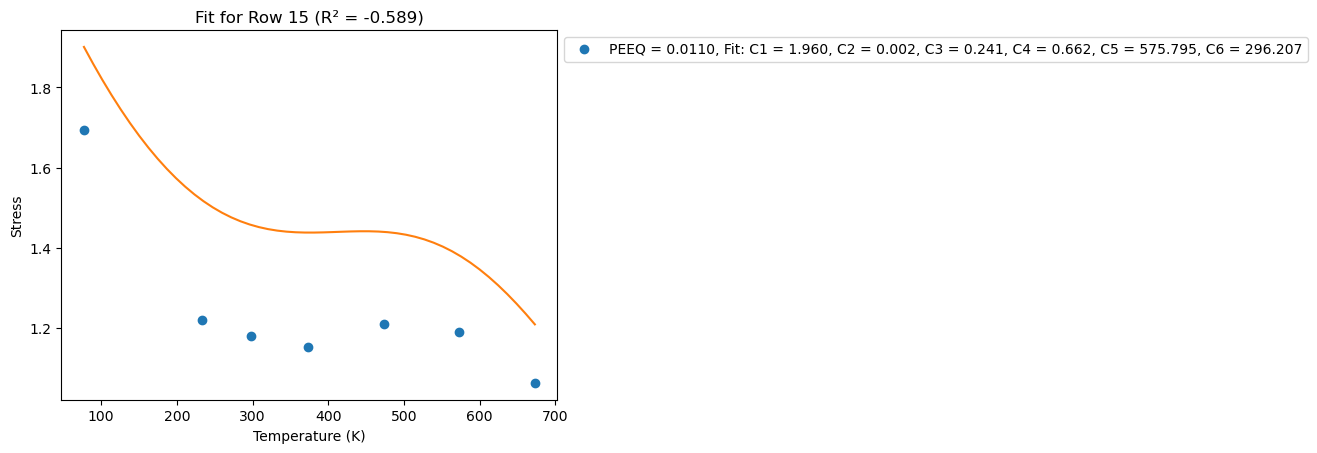

[1.73582767 1.26666909 1.22148435 1.19679938 1.25309879 1.2417217
 1.0992523 ]


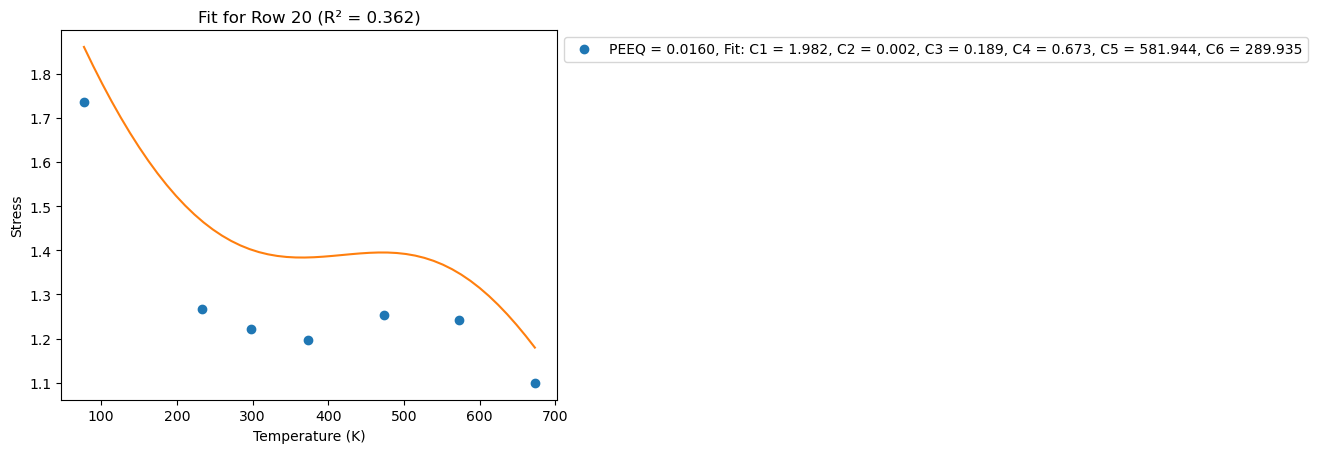

[1.76639812 1.30030023 1.24872655 1.22594285 1.28309271 1.27786607
 1.12333138]


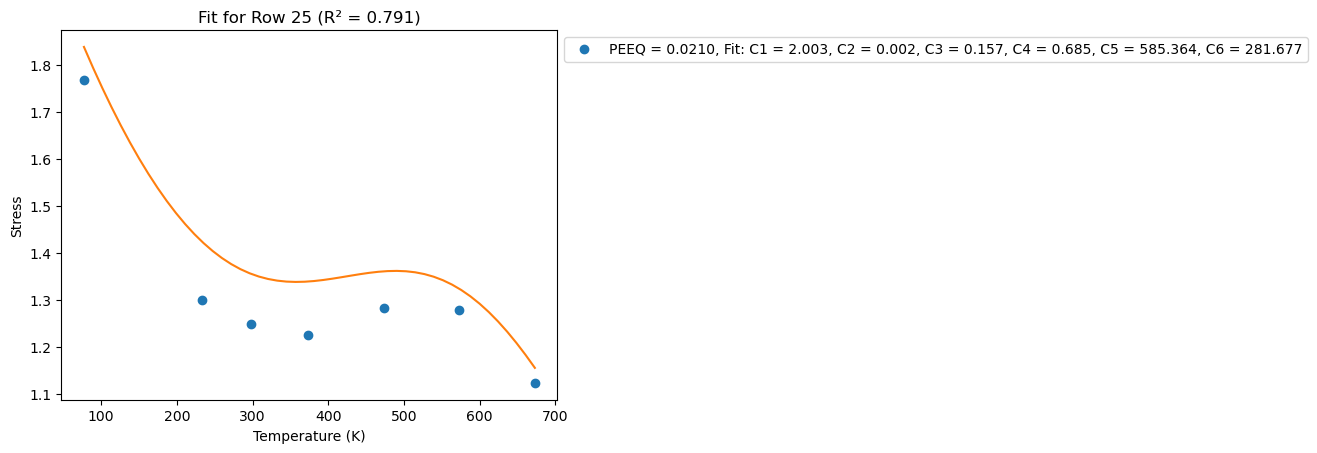

[1.79137792 1.32593264 1.26892168 1.24747859 1.30611125 1.30571746
 1.14129182]


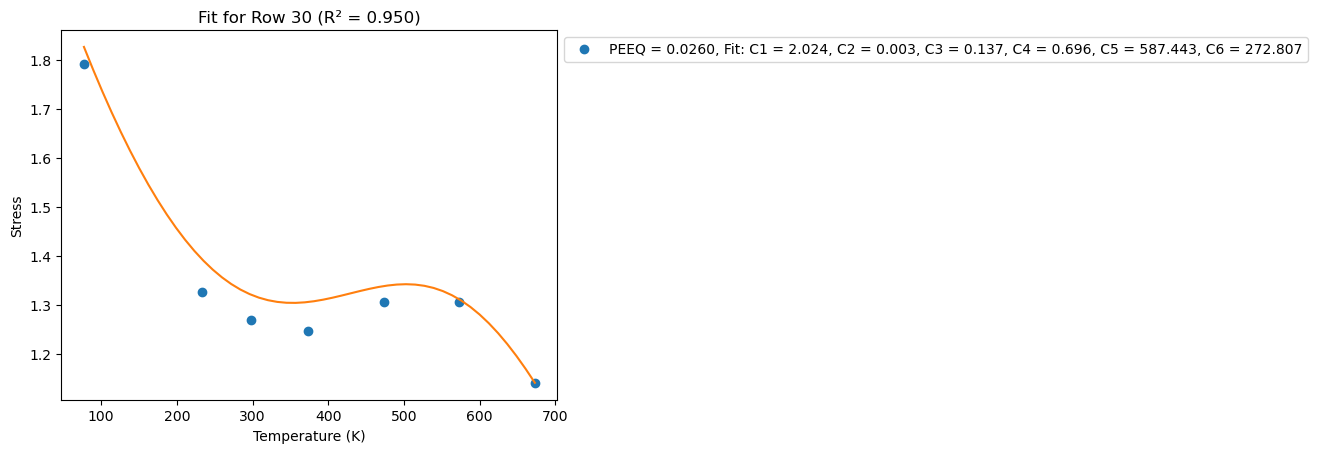

[1.81294897 1.34585779 1.28481835 1.2643595  1.3247201  1.32830697
 1.15564963]


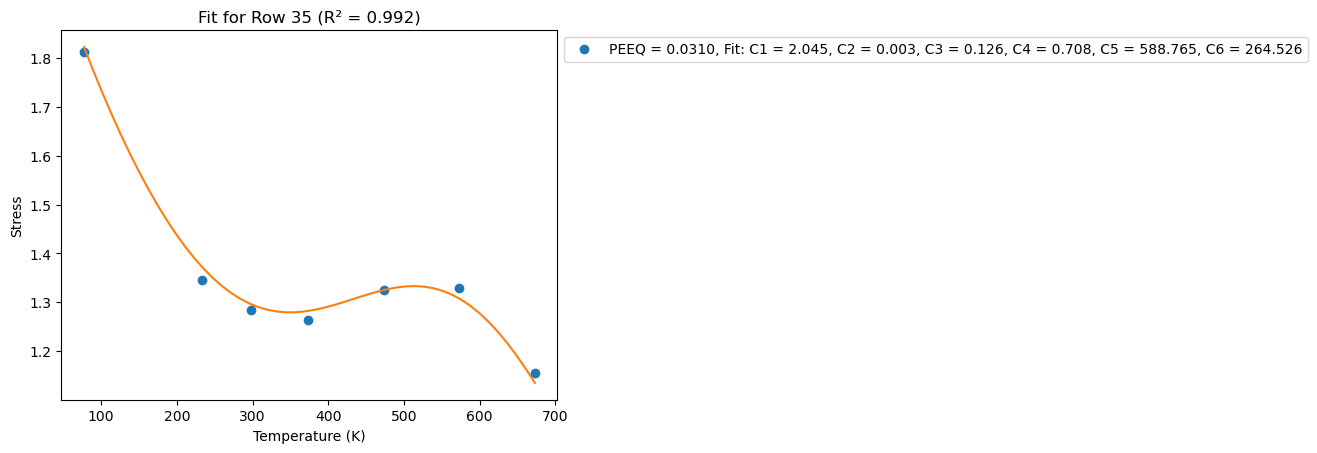

[1.83212564 1.36158161 1.29783969 1.2781888  1.34029708 1.34727573
 1.16765452]


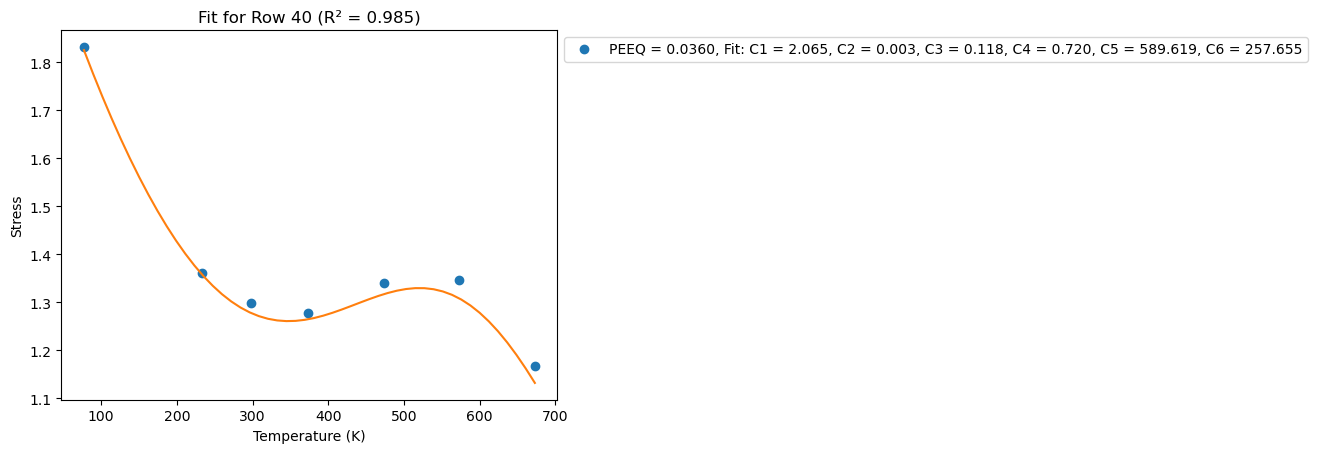

[1.84948588 1.37419193 1.30881299 1.28990356 1.35366587 1.36360489
 1.17799798]


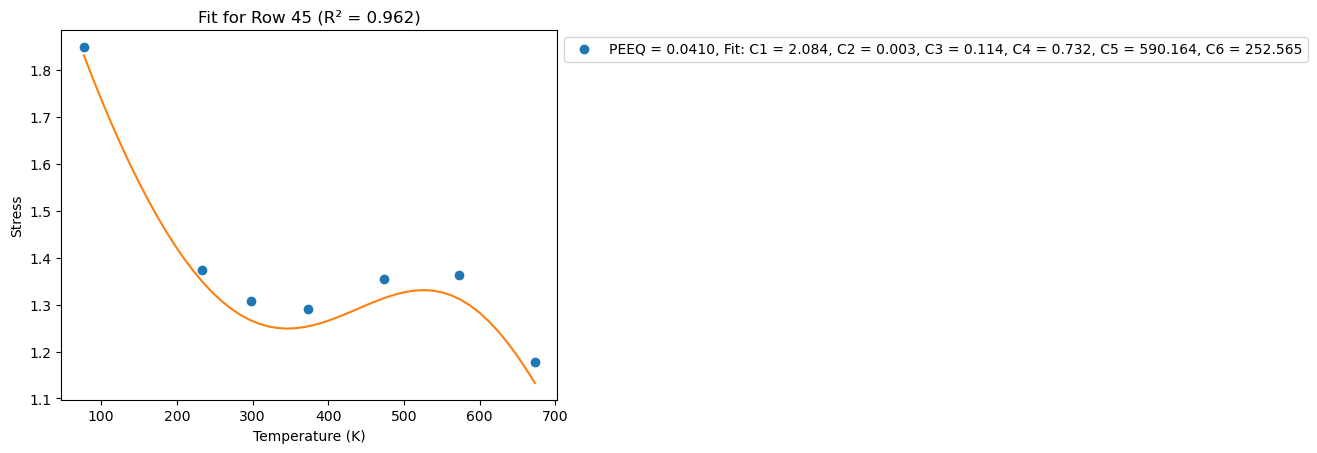

[1.86540465 1.38447627 1.31825937 1.30008214 1.36535724 1.37792634
 1.187099  ]


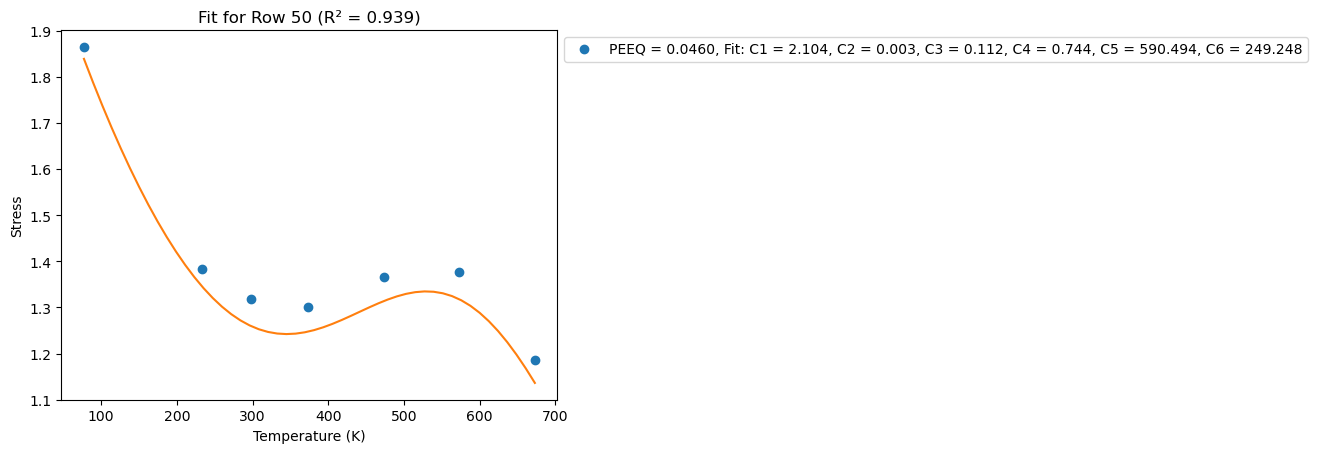

[1.98110548 1.43256427 1.37331745 1.36334497 1.43715622 1.46688103
 1.24474227]


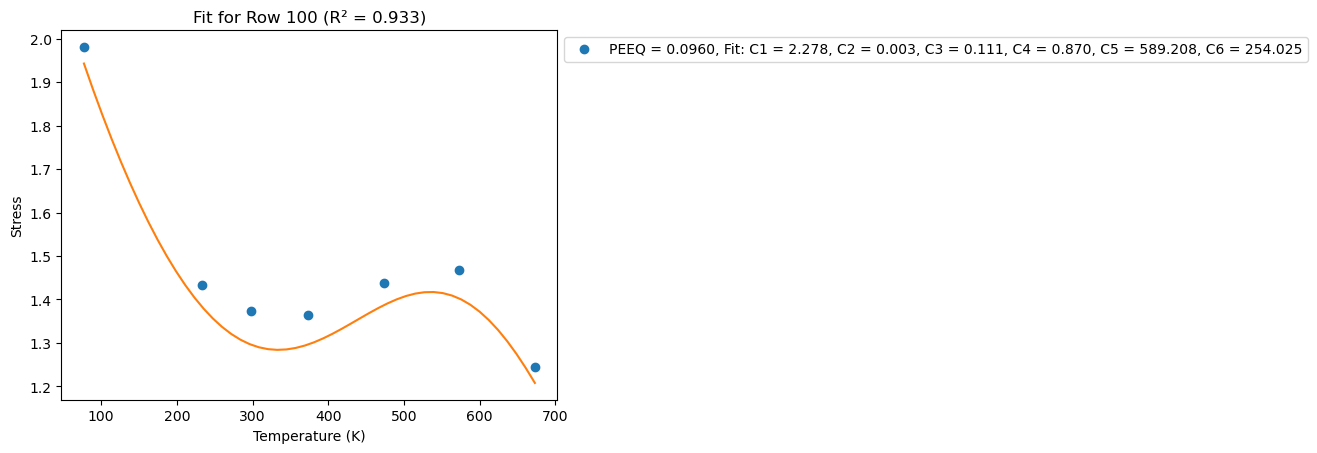

[2.59521003 1.48175971 1.50229406 1.56551056 1.6380874  1.72844315
 1.42941651]


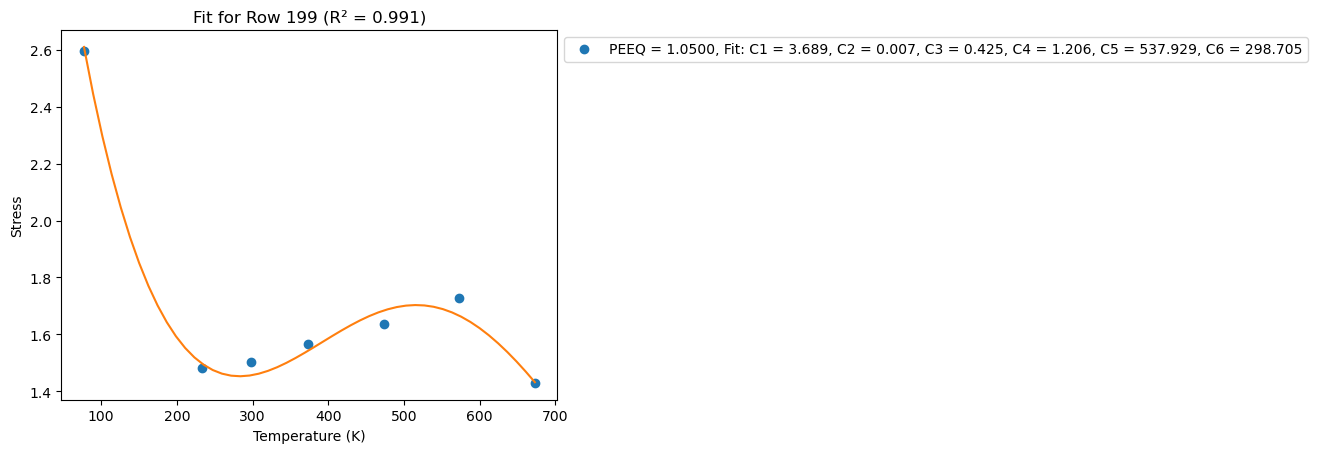

In [315]:
# Temperarute data points
T = np.array([77.15, 233.15, 298.15, 373.15, 473.15, 573.15, 673.15])

# Temperature function
def f_func(T, cT1, cT2, cT3, cT4, cT5, cT6):
    return cT1*(np.exp(-cT2*T))+cT3+cT4*(np.exp(-((T-cT5)/cT6)**2))

for j, i in enumerate(np.array([0, 1, 2, 3, 4, 5, 6, 10, 11, 14, 15, 20, 25, 30, 35, 40, 45, 50, 100, 199])):
    T_fit = np.linspace(np.min(T), np.max(T), 50)
    [C1, C2, C3, C4, C5, C6] = fitted_para.iloc[i, 1:]
    y = stress_data.iloc[i, 8:].values
    print(y)
    gaussian_fit = f_func(T_fit, C1, C2, C3, C4, C5, C6)

    # Calculate residuals for error estimation
    residuals = y - f_func(T, C1, C2, C3, C4, C5, C6)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)

    plt.plot(T, y, 'o', T_fit, gaussian_fit)
    plt.xlabel("Temperature (K)")
    plt.ylabel("Stress")
    plt.title(f"Fit for Row {i} (R² = {r_squared:.3f})")
    plt.legend([f'PEEQ = {fitted_para.iloc[i][0]:.4f}, Fit: C1 = {C1:.3f}, C2 = {C2:.3f}, C3 = {C3:.3f}, C4 = {C4:.3f}, C5 = {C5:.3f}, C6 = {C6:.3f}'], loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    
else:
    str(0)